# <center>Portuguese Bank Marketing Analytics

# Table of Contents
1. **[Project Background](#1)**
2. **[Load the data and Examine the data](#2)**
3. **[Data Cleaning](#3)**
4. **[Exploratory Data Analysis](#4)**
5. **[Data Visualization](#5)**
6. **[Machine Learning: Classification](#6)**
7. **[Conclusion & Recommendations](#7)**

### 1. Project Background

Portuguese bank lost their revenue, and they wanted to investigate why their revenue declined. So, they can take necessary steps to solve bank problems. After deep analysis, they discovered that the main reason is that their clients are not depositing as frequently as before. Expressive to term deposits allow banks to hold onto a deposit for certain amount of time, so banks can invest in higher gain financial products to make a profit. Furthermore, banks also hold better chance to encourage term deposit clients into buying other products such as funds or insurance to further increase their revenues. Consequently, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

###### This Jupyter Notebook loads, explores, and visualizes the Bank Marketing datasets. Also, builds and tests several predictive models, and then predict if client will subscribe a term deposit on test data using the best model.

In [1]:
# Current workspace
!pwd

/Users/suroor/Desktop/Springboard/Bank-Marketing-Campaign-for-Term-Deposit/Bank-Marketing-Client-Subscription-


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']= 'True'
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import plotly.graph_objs as go
from sklearn.utils import shuffle
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%matplotlib inline

###  2. Load the data and Examine the data

In [3]:
#Load csv file to pd dataframe
bank_data = pd.read_csv("bank-additional-full.csv",sep=';')

#### <font color=green>*Examine the data*</font>

In [4]:
# Columns information
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
#change column names
bank_data.rename(columns={'default': 'has_credit','housing':'housing_loan','loan':'personal_loan','y':'subscribed'}, inplace=True)
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'has_credit', 'housing_loan',
       'personal_loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'subscribed'],
      dtype='object')

In [6]:
# print first five rows of bank_data
bank_data.head()

,age,job,marital,education,has_credit,housing_loan,personal_loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# display total number of rows and columns
bank_data.shape

(41188, 21)

In [8]:
# verify data types of bank_data information 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
has_credit        41188 non-null object
housing_loan      41188 non-null object
personal_loan     41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
subscribed        41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
# Describe numeric bank_data
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# check the occurrence of each job in bank_data
bank_data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### 3. Data Cleaning

<img src='https://www.officedepot.com/resource/blob/60908/0f84e67038ac7cd8966cacaaab7f92fb/know-what--and-when--to-purge-data.gif' width='500'>

#### *Check for Duplicates*

In [11]:
bank_data.duplicated().sum()

12

#### *Check invalid or corrupt data and remove it*

In [12]:
'''remove duplicated rows'''
def clean_data(data):
    clean_data = data.drop_duplicates()
    return clean_data

In [13]:
clean_bank_data = clean_data(bank_data)
clean_bank_data.shape

(41176, 21)

In [14]:
clean_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
has_credit        41176 non-null object
housing_loan      41176 non-null object
personal_loan     41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
subscribed        41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### 4. Exploratory Data Analysis

<img src='http://piesiecreativity.com/wp-content/uploads/2018/02/Online-online.gif' width='500'>

In [15]:
'''Divide varibles in categorical and numerical'''
categorical_vars = [col for col in clean_bank_data.columns if (clean_bank_data[col].dtype == 'object') & (col != 'subscribed')]
numeric_vars = ['age', 'duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
target_var = ['subscribed']

In [16]:
# seperate feature and traget variables
X = clean_bank_data.iloc[:,:-1]
y = clean_bank_data.iloc[:,-1]

#### Target Variable

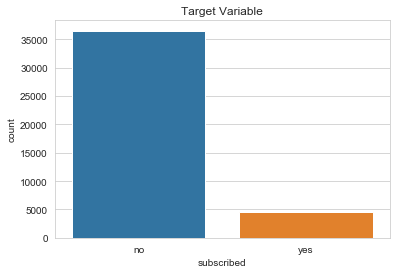

In [17]:
# explore target variable data
sns.set_style("whitegrid")
sns.countplot(x = 'subscribed', data = clean_bank_data)
plt.title('Target Variable')
plt.show()

Target variable 'subscribed ‘is very imbalanced. In classification and evaluation, predictor variable should be balanced to not get any bias result. In above count plot, there is clear prediction with roughly 90% accuracy just by guessing none of the clients subscribed to the term deposit. Our main goal are focused only on the clients who said ‘yes’, but we have only 4639 total ‘yes’ values compare to 36537 ‘no’ values. Therefore, we have very less chances to get predictions. We will balance our data using SMOTE (Synthetic Minority Over-sampling Technique)

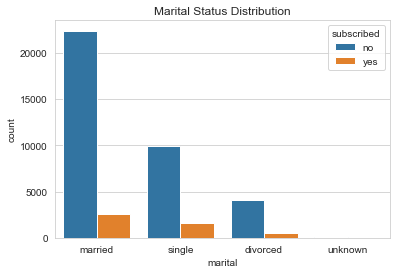

In [18]:
sns.countplot(x ='marital', hue = 'subscribed', data = clean_bank_data)
plt.title('Marital Status Distribution')
plt.show()

#### *Summarize numeric variable*

In [19]:
X.describe(include=[np.number])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### *summarize categorical variable*

In [20]:
X.describe(include = ['O'])

,job,marital,education,has_credit,housing_loan,personal_loan,contact,month,day_of_week,poutcome
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551


#### *Find Correction of variables*

In [21]:
def get_correlation(data):
    return data.corr()

corr_data = get_correlation(X)
corr_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


### 5. Data Visualization

<img src='https://media0.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif' width='500'>

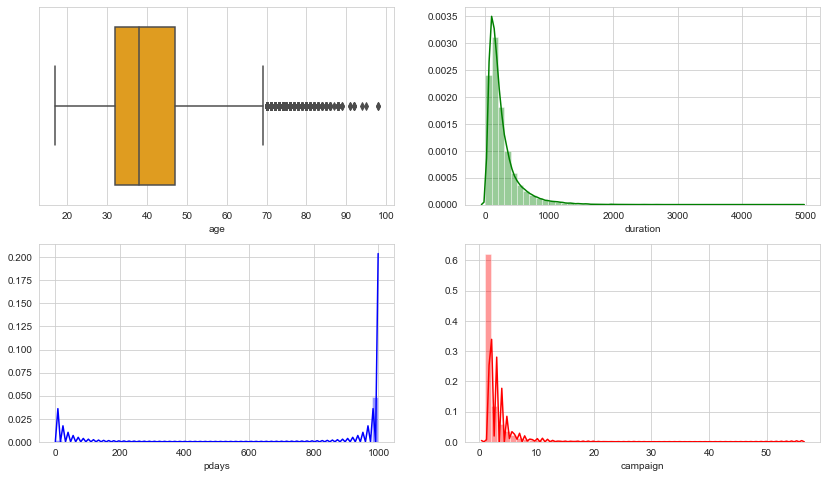

In [22]:
plt.figure(figsize = (14, 8))
plt.subplot(2,2,1)
sns.boxplot(X.age, color='Orange')
plt.subplot(2,2,2)
sns.distplot(X.duration, color='green')
plt.subplot(2,2,3)
sns.distplot(X['pdays'], color='blue')
plt.subplot(2,2,4)
sns.distplot(X.campaign, color='red')
plt.show()

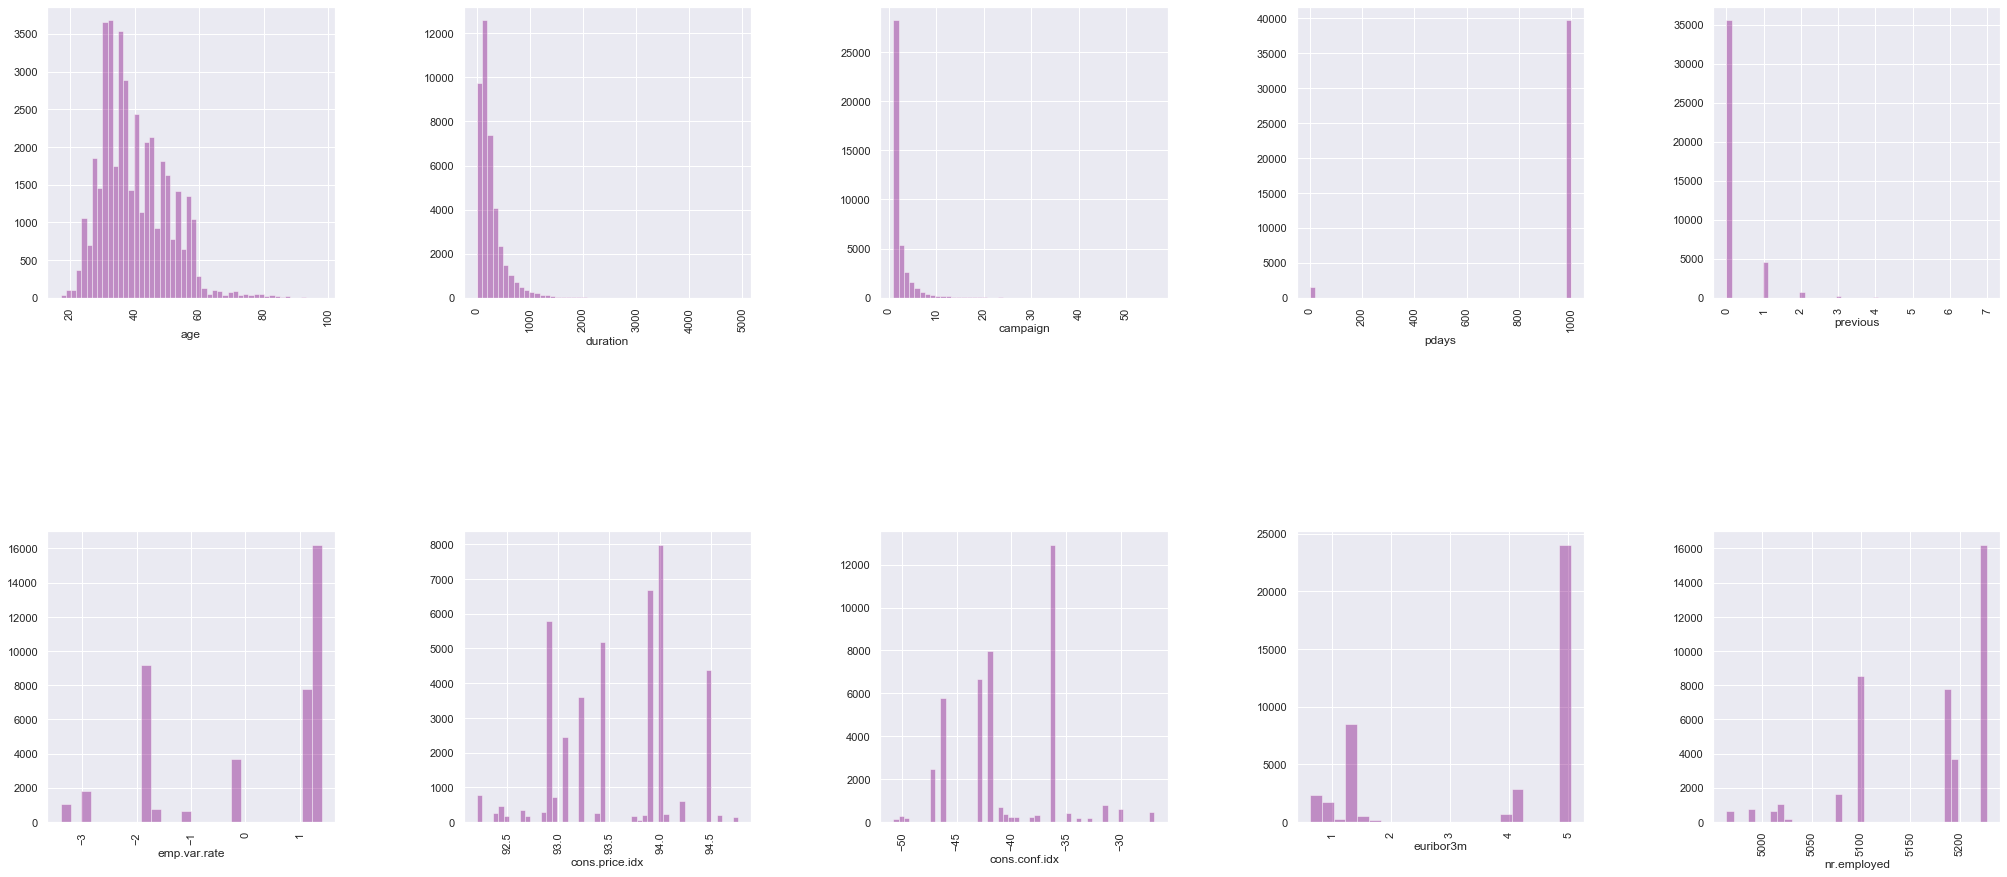

In [23]:
# Visualize all numerical variables
sns.set(style="darkgrid")
fig, ax = plt.subplots(2, 5, figsize=(35, 15))
for variable, subplot in zip(numeric_vars, ax.flatten()):
    sns.distplot(X[variable], ax=subplot, kde=False, hist=True,color='purple')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.subplots_adjust(wspace=0.45, hspace=0.8)

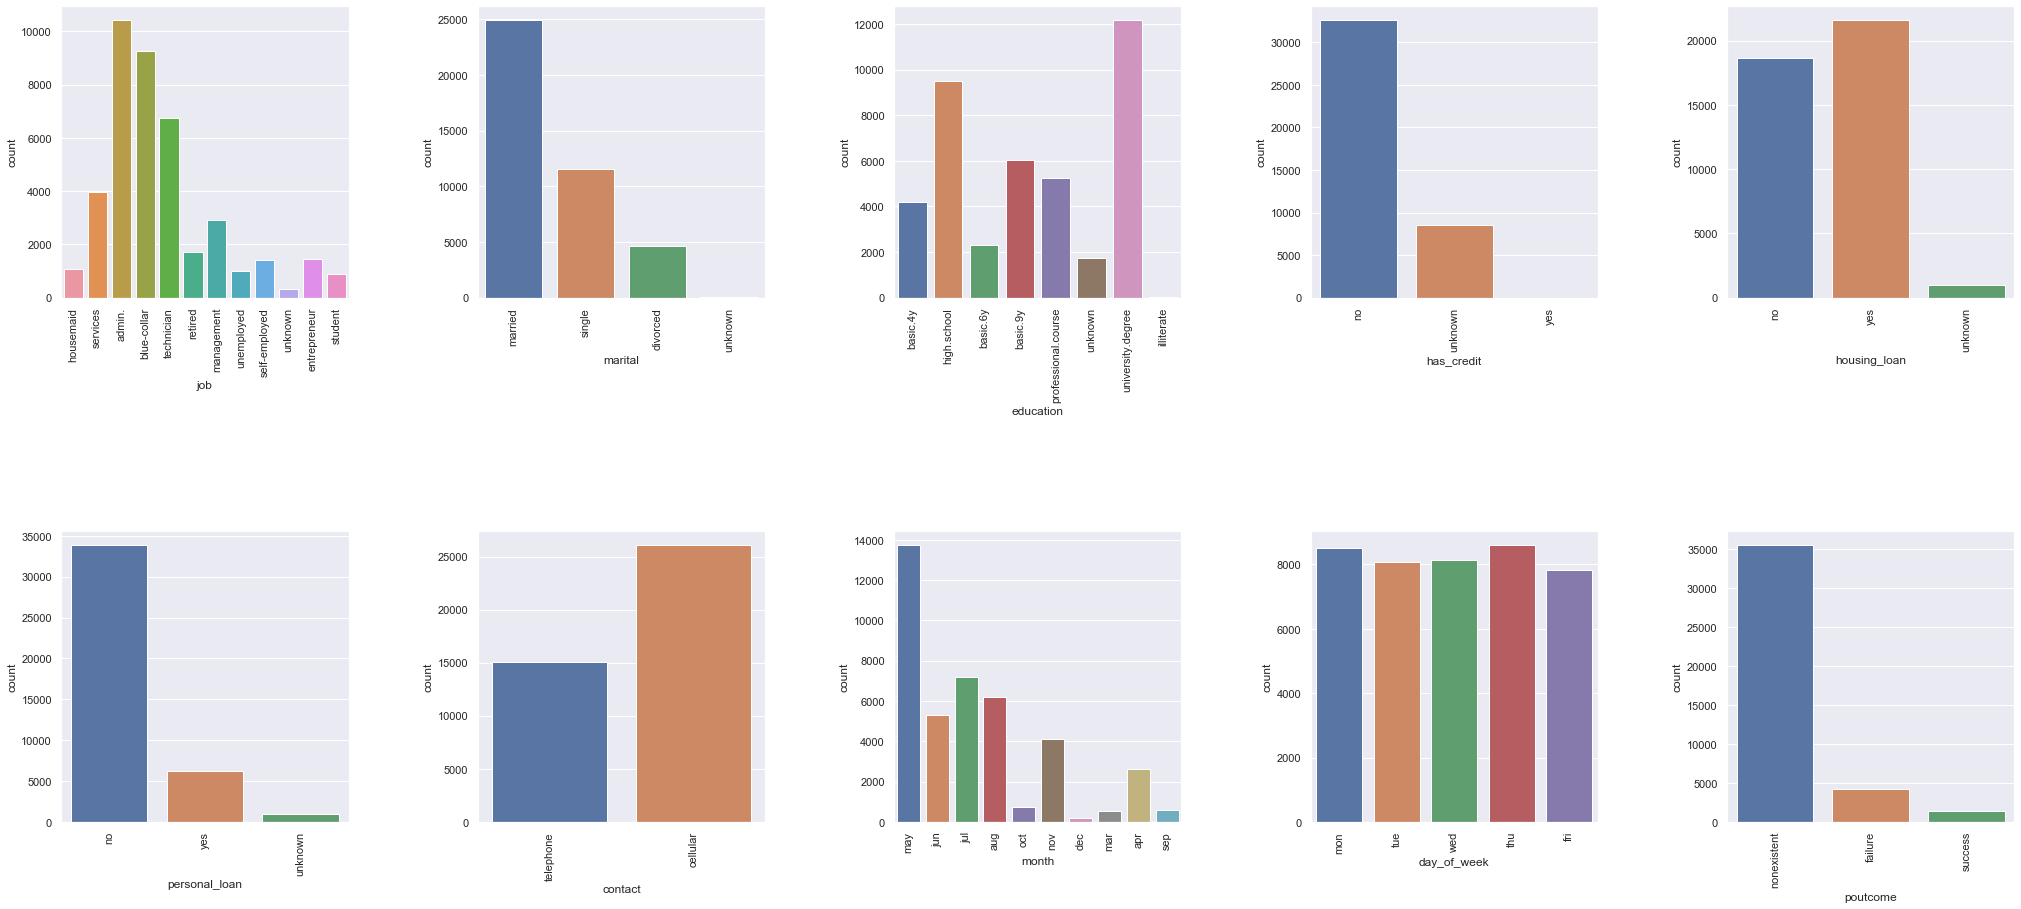

In [24]:
# Visualize all categorical variables
sns.set(style="darkgrid")
fig, ax = plt.subplots(2, 5, figsize=(35, 15))
for variable, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(X[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.subplots_adjust(wspace=0.45, hspace=0.8)


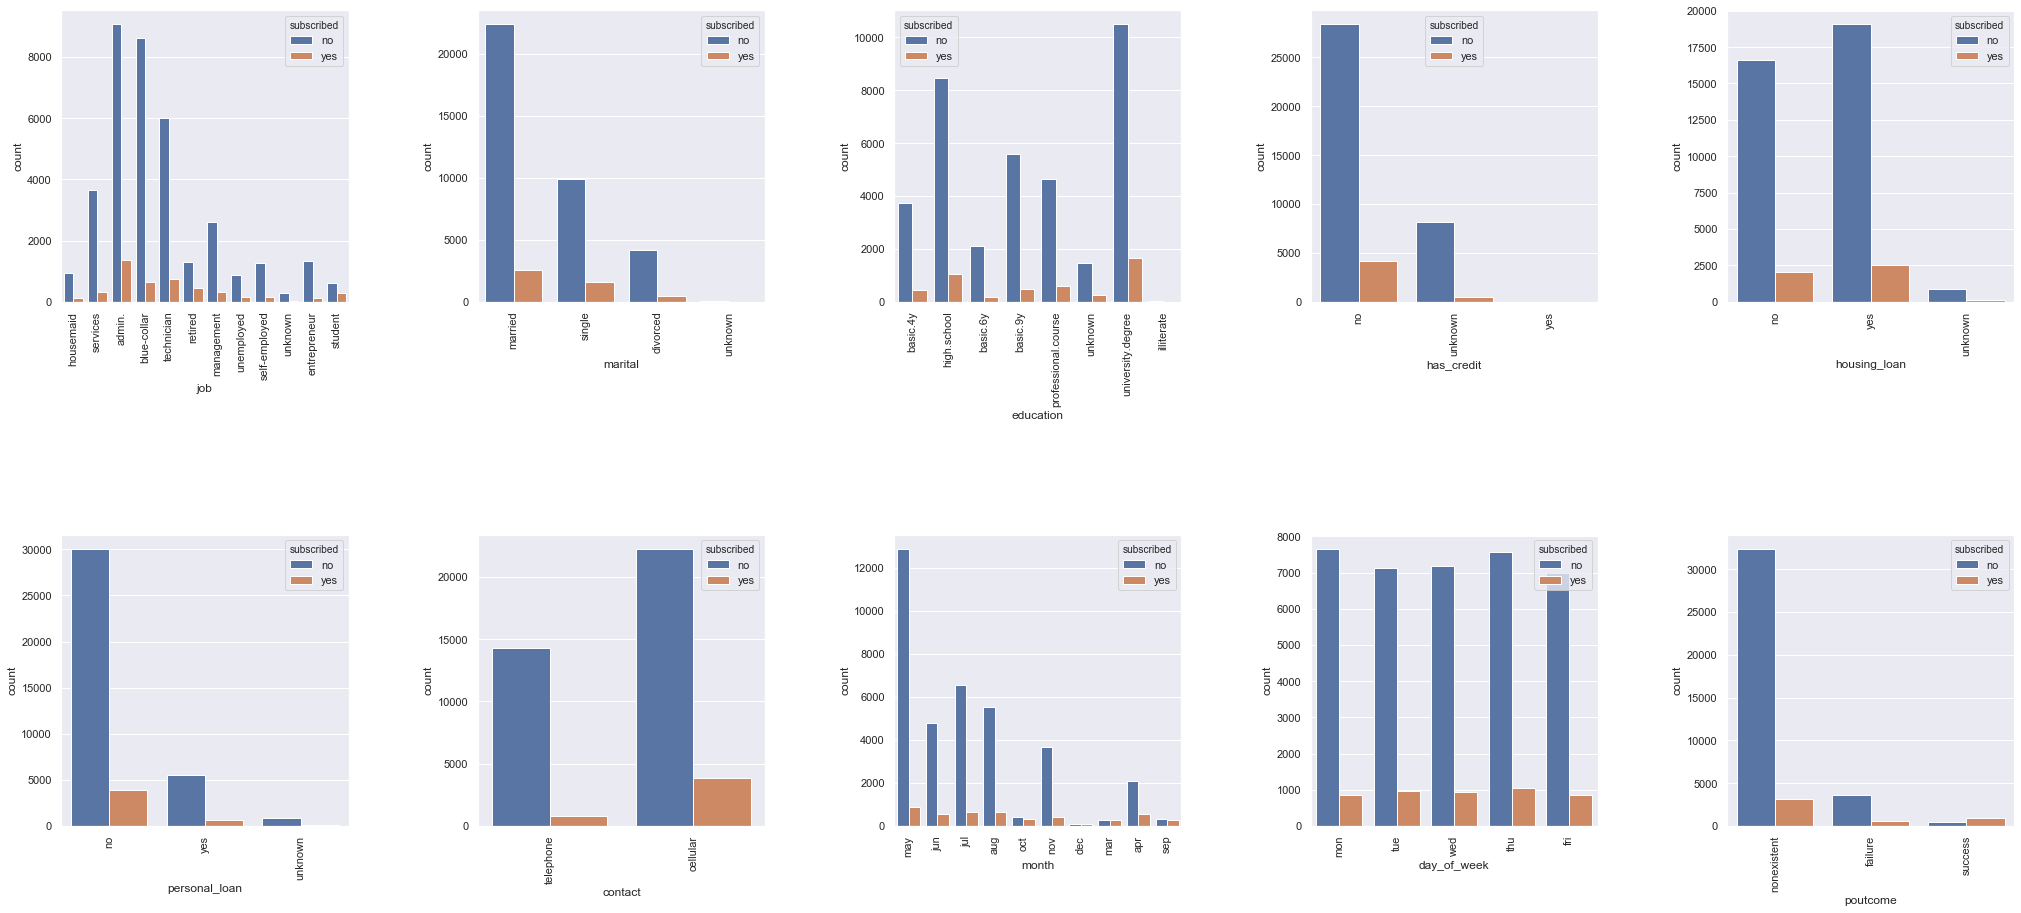

In [25]:
fig, ax = plt.subplots(2, 5, figsize=(35, 15))
for variable, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(x=variable,hue='subscribed',data=clean_bank_data,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.subplots_adjust(wspace=0.45, hspace=0.8)

In [26]:
vals = X['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(x=labels, y=vals, marker=dict(color="#76D7C4"))]

layout = go.Layout(title="Count by Marital Status",)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='marital bar')

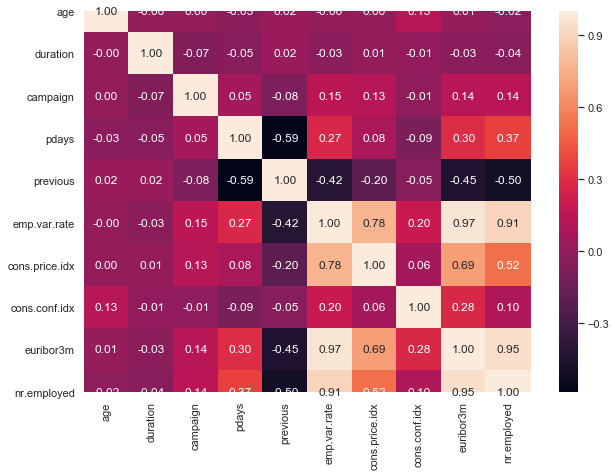

In [27]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (10,7))
a = sns.heatmap(corr_data, annot = True, fmt = ".2f")

### 6. Machine Learning: Classification

<img src='https://cdn-images-1.medium.com/max/1600/0*NbQlrmQFOsjPFB-f.gif' width='500'>

In [28]:
# import LabelEncoder and instantiate object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# apply LabelEncoder object on categorical columns
X = X.apply(le.fit_transform)
X.head()

,age,job,marital,education,has_credit,housing_loan,personal_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8


In [29]:
#import OneHotEncoder and instantiate object
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(X)
X = ohe.transform(X).toarray()
X.shape

/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



(41176, 2141)

In [30]:
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
X.shape

(41176, 2141)

In [32]:
y, unique = pd.factorize(y)
y

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)


In [34]:
 #onehotlabels1 = pd.get_dummies(X)
 #onehotlabels1.shape

In [35]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#### Balance dataset using SMOTE: Synthetic Minority Over-sampling Technique

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

In [37]:
columns = X_train.columns
smote_X, smote_y = smote.fit_sample(X_train, y_train)
smote_X = pd.DataFrame(data=smote_X,columns=columns )
smote_y= pd.DataFrame(data=smote_y,columns=['subscribed'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(smote_X))
print("Number of no subscription in oversampled data",len(smote_y[smote_y['subscribed']==0]))
print("Number of subscription",len(smote_y[smote_y['subscribed']==1]))
print("Proportion of no subscription data in oversampled data is ",len(smote_y[smote_y['subscribed']==0])/len(smote_X))
print("Proportion of subscription data in oversampled data is ",len(smote_y[smote_y['subscribed']==1])/len(smote_X))

/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



length of oversampled data is  51024
Number of no subscription in oversampled data 25512
Number of subscription 25512
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X= smote_X
y= smote_y

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
columns = X_train.columns

In [41]:
print('Training Features Shape:', X_train.shape)
print('Training test Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing test Shape:', y_test.shape)

Training Features Shape: (35716, 2141)
Training test Shape: (15308, 2141)
Testing Features Shape: (35716, 1)
Testing test Shape: (15308, 1)


In [42]:
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussiaNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models = [
     ('LR',LogisticRegression()),
     ('NB',GaussianNB()),
     ('DT',DecisionTreeClassifier())
     ]
for name, model in models:
    clf = model
    clf.fit(X_train,y_train)
    accuracy = clf.score(X_test,y_test)
    print(name,': ',accuracy)

/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LR :  0.9191272537235432


/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



NB :  0.8238176117062974
DT :  0.9310164619806637


In [43]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 50 decision trees
rf = RandomForestClassifier(n_estimators = 100, max_depth=100, min_samples_leaf=3,min_samples_split=8
                            , random_state = 42, n_jobs=1)

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
y_predict = rf.predict(X_test)

/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [44]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

# Print out the mean absolute error (mae)
print('Mean Absolute Error {:0.3f}'.format(mean_absolute_error(y_test, y_predict)))

#acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
#print(round(acc_random_forest,2,), "%")

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_predict))

print("Classification Report:")
print(classification_report(y_test, y_predict))

Accuracy: 0.9174287954010975
Mean Absolute Error 0.083
Confusion Matrix:
[[7050  576]
 [ 688 6994]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7626
           1       0.92      0.91      0.92      7682

    accuracy                           0.92     15308
   macro avg       0.92      0.92      0.92     15308
weighted avg       0.92      0.92      0.92     15308



### Cross Validation (K-fold)

In [45]:
from sklearn.model_selection import KFold, cross_val_score
K_fold = KFold (n_splits=10, shuffle=True,random_state=0)

In [46]:
clf = RandomForestClassifier(n_estimators = 10)
score = cross_val_score(clf,X_test,y_test,cv=5,n_jobs=1,scoring='accuracy')
score

/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shap

array([0.90303624, 0.91312867, 0.90329958, 0.90427965, 0.8990526 ])

In [47]:
round(np.mean(score)*100,2)

90.46

In [48]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [49]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 73, 126, 180, 233, 286, 340, 393, 446, 500]}


In [50]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 150, 180, 200]
}
# Create a based model
rf1 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [51]:
grid_search.fit(X_train, y_train)
#grid_search.best_params_

#======Output will be below=======
#{'bootstrap': True,
# 'max_depth': 100,
# 'max_features': 3,
# 'min_samples_leaf': 3,
# 'min_samples_split': 8,
# 'n_estimators': 100}

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 64.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 76.3min finished
/Users/suroor/Documents/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [52]:
best_grid = grid_search.best_estimator_
print(best_grid)
grid_accuracy = accuracy_score(y_test, y_predict)
print(grid_accuracy)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - accuracy) / accuracy))
 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9174287954010975
Improvement of 0.00%.


In [53]:
for name, importance in zip(X, rf.feature_importances_):
    print(name, "=", importance)


0 = 1.3398790081967916e-07
1 = 6.893084019353078e-05
2 = 0.0001487694475800302
3 = 9.634740979835778e-05
4 = 0.00019324463666677848
5 = 0.0004250467207399577
6 = 0.0009392832601874253
7 = 0.0009177766642973682
8 = 0.0010620884283057193
9 = 0.0016014470333708618
10 = 0.0015288948553700565
11 = 0.0021192978056588196
12 = 0.0031719342243930154
13 = 0.003332249219033785
14 = 0.00574073258849937
15 = 0.0038884694464225004
16 = 0.003935693552622251
17 = 0.005161932089514642
18 = 0.004639559975420156
19 = 0.003940290908317004
20 = 0.0032758483468537853
21 = 0.0031636284486753962
22 = 0.003954745342862121
23 = 0.002413492121747614
24 = 0.002425579300784288
25 = 0.002472920020494686
26 = 0.002763311351906883
27 = 0.002334439679718677
28 = 0.0030886161197129407
29 = 0.0019369528806929158
30 = 0.0012436998494728888
31 = 0.001782738858590417
32 = 0.0010104440312037964
33 = 0.0015246088709144681
34 = 0.0009700518699767963
35 = 0.0013225974466067267
36 = 0.0009978041917948668
37 = 0.0011177890424909

768 = 0.00011446343783312745
769 = 0.00025315216288606377
770 = 3.2938096758625283e-06
771 = 0.0
772 = 0.0
773 = 0.00040454252001607813
774 = 0.00016711110357920652
775 = 6.208347169370615e-06
776 = 0.00020219906490187228
777 = 0.0003640584333175234
778 = 0.00016173531790733824
779 = 0.00040304625696944437
780 = 8.286021028490027e-05
781 = 0.00031621620209113194
782 = 0.0001417490501037599
783 = 0.0
784 = 4.6706105206886326e-06
785 = 0.00021354979340143531
786 = 0.00032615098984817796
787 = 0.00022889701369517237
788 = 0.0
789 = 4.4781250814125223e-05
790 = 0.0002493880864688448
791 = 0.0002420756315156353
792 = 0.0005574071071024812
793 = 2.6353282127531683e-07
794 = 2.8220219842342384e-05
795 = 0.00024280389707137618
796 = 1.2339318194936654e-05
797 = 0.00015978476290559845
798 = 0.00017834170519253706
799 = 3.389132165474744e-05
800 = 0.00010420452524040848
801 = 0.000181237149318775
802 = 4.2318089697366326e-05
803 = 0.0
804 = 0.00013924421436005863
805 = 0.0001942295923867399
806 

1927 = 7.484683091437457e-05
1928 = 9.573763526570536e-05
1929 = 0.0001344430394950568
1930 = 8.989297091610026e-05
1931 = 4.076984203062849e-05
1932 = 0.00023174336412094834
1933 = 3.3101428958939536e-05
1934 = 1.7157942622167528e-05
1935 = 5.468702670970708e-05
1936 = 0.000961791514472761
1937 = 2.1839828932009014e-05
1938 = 0.00019364351020420618
1939 = 3.149708684779275e-05
1940 = 0.00036649346191096663
1941 = 0.0002440013083300138
1942 = 4.180885844123009e-05
1943 = 9.504798643696704e-05
1944 = 0.0
1945 = 1.9761407044842286e-05
1946 = 0.0
1947 = 0.0
1948 = 1.2045658748747099e-05
1949 = 0.0
1950 = 0.0
1951 = 5.544258214857263e-05
1952 = 9.175655696716672e-05
1953 = 0.00016970064575758372
1954 = 2.2336362495079964e-05
1955 = 3.758701178490718e-06
1956 = 0.00011681346039888931
1957 = 9.182294642076197e-06
1958 = 1.5671976067603322e-05
1959 = 0.0
1960 = 2.577072539074442e-06
1961 = 0.0
1962 = 2.0845401746088654e-05
1963 = 0.0
1964 = 0.0
1965 = 0.0
1966 = 0.0
1967 = 0.0
1968 = 1.765641

### 8. Conclusion & Recommendations

<img src='https://www.usefultechtips.com/wp-content/uploads/2018/01/how-to-improve-website-speed.jpg' width='600'>